# **Import Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [17]:
print(f'matplotlib vesion: {matplotlib.__version__}')
print(f'pandas vesion:     {pd.__version__}')
print(f'numpy vesion:      {np.__version__}')
print(f'seaborn vesion:    {sns.__version__}')
print(f'sklearn vesion:    {skl.__version__}')

matplotlib vesion: 3.2.2
pandas vesion:     1.1.5
numpy vesion:      1.19.5
seaborn vesion:    0.11.1
sklearn vesion:    0.22.2.post1


# **load Datasets**

In [18]:
train = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/Test.csv')

In [19]:
train.head(10)

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0
5,ID_002OY1ME,77,0,69.0,2,NaN,NaN,2,NaN,1.0,NaN,2,2,2,2.0,2,2,2,2,1,NaN,1,6.0,NaN,2.0,2,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0
6,ID_002SIOPQ,141,4,58.0,1,NaN,2.0,2,NaN,1.0,NaN,2,2,2,1.0,1,2,1,2,2,NaN,1,2.0,1.0,2.0,1,2,2.0,NaN,NaN,1,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,0,0
7,ID_003CXK49,97,7,32.0,1,NaN,2.0,2,NaN,2.0,NaN,2,2,2,2.0,2,1,2,2,2,NaN,1,2.0,NaN,2.0,2,2,NaN,NaN,NaN,1,2,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,0
8,ID_003OKZ71,60,2,59.0,1,1.0,2.0,2,NaN,NaN,NaN,2,2,2,2.0,2,2,2,2,1,NaN,2,NaN,2.0,2.0,2,2,NaN,2.0,NaN,2,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1,0
9,ID_004ACG4R,69,0,60.0,2,NaN,NaN,2,1.0,2.0,2.0,2,2,2,2.0,2,2,2,1,2,2.0,1,4.0,2.0,2.0,2,2,NaN,NaN,NaN,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,1,0


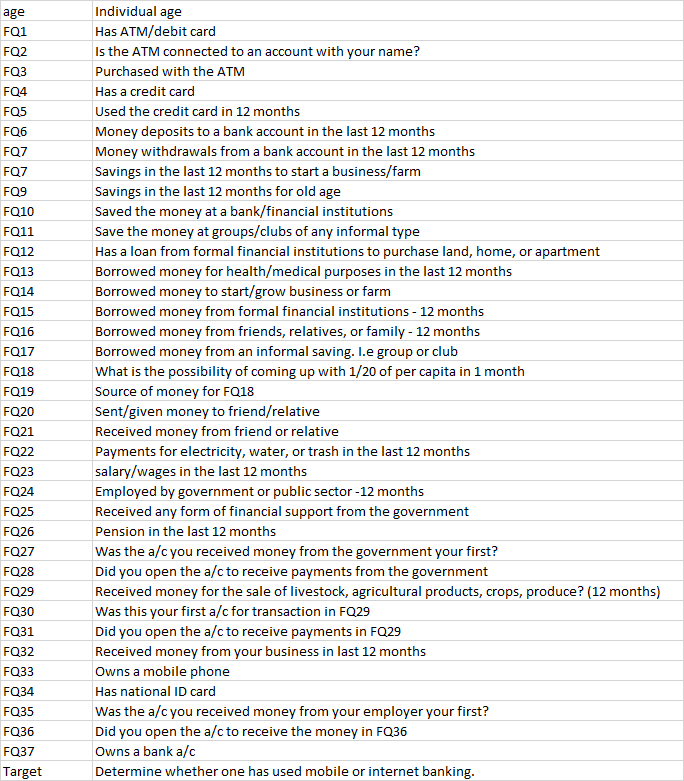

In [20]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country_code,108446.0,68.544953,41.529264,0.0,33.0,65.0,105.0,143.0
region,108446.0,2.894242,2.286505,-1.0,1.0,3.0,4.0,7.0
age,108124.0,41.857395,17.876105,15.0,27.0,39.0,55.0,99.0
FQ1,108446.0,1.563294,0.530077,1.0,1.0,2.0,2.0,4.0
FQ2,49124.0,1.063716,0.288075,1.0,1.0,1.0,1.0,4.0
FQ3,46218.0,1.299710,0.468503,1.0,1.0,1.0,2.0,4.0
FQ4,108446.0,1.824622,0.435942,1.0,2.0,2.0,2.0,4.0
FQ5,21185.0,1.160113,0.383827,1.0,1.0,1.0,1.0,4.0
FQ6,60659.0,1.223907,0.450140,1.0,1.0,1.0,1.0,4.0
FQ7,60620.0,1.206961,0.440780,1.0,1.0,1.0,1.0,4.0


In [21]:
train.FQ36.value_counts()

1.0    7643
2.0    3806
3.0      27
4.0       7
Name: FQ36, dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [23]:
train.isnull().sum() / train.shape[0] * 100

ID               0.000000
country_code     0.000000
region           0.000000
age              0.296922
FQ1              0.000000
FQ2             54.701879
FQ3             57.381554
FQ4              0.000000
FQ5             80.464932
FQ6             44.065249
FQ7             44.101212
FQ8              0.000000
FQ9              0.000000
FQ10             0.000000
FQ11            22.656437
FQ12             0.000000
FQ13             0.000000
FQ14             0.000000
FQ15             0.000000
FQ16             0.000000
FQ17            89.536728
FQ18             0.000000
FQ19            43.714844
FQ20            22.756948
FQ21            22.716375
FQ22             0.000000
FQ23             0.000000
FQ24            64.561164
FQ35            76.127289
FQ36            89.411320
FQ25             0.000000
FQ26             0.000000
FQ27            97.049223
FQ28            98.611290
FQ29            22.623241
FQ30            98.049721
FQ31            99.198680
FQ32            43.938919
FQ33        

In [24]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)

In [25]:
all_data.isnull().sum()/ all_data.shape[0] *100

ID               0.000000
country_code     0.000000
region           0.000000
age              0.291112
FQ1              0.000000
FQ2             54.864675
FQ3             57.303951
FQ4              0.000000
FQ5             80.572284
FQ6             44.141929
FQ7             44.141929
FQ8              0.000000
FQ9              0.000000
FQ10             0.000000
FQ11            22.679008
FQ12             0.000000
FQ13             0.000000
FQ14             0.000000
FQ15             0.000000
FQ16             0.000000
FQ17            89.527055
FQ18             0.000000
FQ19            43.740439
FQ20            22.679008
FQ21            22.679008
FQ22             0.000000
FQ23             0.000000
FQ24            64.500429
FQ35            76.155251
FQ36            89.425069
FQ25             0.000000
FQ26             0.000000
FQ27            97.003027
FQ28            98.620605
FQ29            22.679008
FQ30            98.069363
FQ31            99.204121
FQ32            43.974749
FQ33        

In [26]:
mean_age = all_data['age'].mean()
all_data['age'].fillna(mean_age, inplace= True)

In [27]:
for col in all_data.columns.difference(['Target']):
  if all_data[col].isnull().sum() > 0:
    all_data[col].fillna(-999, inplace= True)


In [28]:
all_data.isnull().sum()

ID                  0
country_code        0
region              0
age                 0
FQ1                 0
FQ2                 0
FQ3                 0
FQ4                 0
FQ5                 0
FQ6                 0
FQ7                 0
FQ8                 0
FQ9                 0
FQ10                0
FQ11                0
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ17                0
FQ18                0
FQ19                0
FQ20                0
FQ21                0
FQ22                0
FQ23                0
FQ24                0
FQ35                0
FQ36                0
FQ25                0
FQ26                0
FQ27                0
FQ28                0
FQ29                0
FQ30                0
FQ31                0
FQ32                0
FQ33                0
FQ34                0
FQ37                0
Target          46477
dtype: int64

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154923 entries, 0 to 154922
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            154923 non-null  object 
 1   country_code  154923 non-null  int64  
 2   region        154923 non-null  int64  
 3   age           154923 non-null  float64
 4   FQ1           154923 non-null  int64  
 5   FQ2           154923 non-null  float64
 6   FQ3           154923 non-null  float64
 7   FQ4           154923 non-null  int64  
 8   FQ5           154923 non-null  float64
 9   FQ6           154923 non-null  float64
 10  FQ7           154923 non-null  float64
 11  FQ8           154923 non-null  int64  
 12  FQ9           154923 non-null  int64  
 13  FQ10          154923 non-null  int64  
 14  FQ11          154923 non-null  float64
 15  FQ12          154923 non-null  int64  
 16  FQ13          154923 non-null  int64  
 17  FQ14          154923 non-null  int64  
 18  FQ15

In [30]:
for col in all_data.columns.difference(['Target']):
  if all_data[col].dtype == 'float64':
    all_data[col] = all_data[col].astype(int)

In [31]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((108446, 42), (46477, 42))

In [49]:
X = train_df.iloc[:,1:-1]
y = train_df['Target']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [33]:
def evaluate_model(y_test,y_pred):                                              #function return classifations matrix for every model
  acc = round(accuracy_score(y_test, y_pred),2)
  prec = round(precision_score(y_test, y_pred),2)                               # tp / (tp + fp)
  rec = round(recall_score(y_test, y_pred),2)                                   # tp / (tp + fn)
  f1 = round(f1_score(y_test, y_pred),2)
  return pd.DataFrame({'Metrics':['Accuracy','Precision','Recall','F1'],
                       'Scores':[acc,prec,rec,f1]})
  

In [36]:
# Confusion matrix
def confusion_mat(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
  plt.figure(figsize = (8,6))
  plt.title('Confusing Matrix')
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True, fmt='g')

In [48]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

model = LGBMClassifier()

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

features = train_df.columns.difference(['ID','Target'])

fold_metrics = []

for train_index, test_index in str_kf.split(train_df.iloc[:,1:],train_df.Target):
  cv_train, cv_test = train_df.iloc[train_index], train_df.iloc[test_index]
# Train a model
  model.fit(cv_train[features],cv_train.Target)
# Make predictions
  predictions = model.predict(cv_test[features])
# Calculate the metric
  metric = roc_auc_score(cv_test.Target, predictions)
  fold_metrics.append(metric)

np.mean(fold_metrics)

0.49993618056402084

In [51]:
y_pred = model.predict(X_test)

evaluate_model(y_test,y_pred)

,Metrics,Scores
0,Accuracy,0.70
1,Precision,0.27
2,Recall,0.05
3,F1,0.08


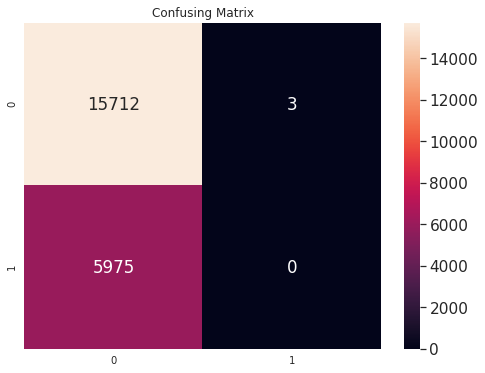

In [41]:
confusion_mat(y_test,y_pred)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84     15715
         1.0       0.00      0.00      0.00      5975

    accuracy                           0.72     21690
   macro avg       0.36      0.50      0.42     21690
weighted avg       0.52      0.72      0.61     21690



In [44]:
ss = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/SampleSubmission.csv')
# Make prediction on the test set
# test_df = test_df[main_cols]

predictions = model.predict_proba(test_df[features])
pred_df = pd.DataFrame(predictions, columns=['0','1'])
# Create a submission file
sub_file = ss.copy()
sub_file.Target = pred_df['1']

In [45]:
# Create a csv file and upload to zindi 
sub_file.to_csv('My_sub.csv', index = False)